In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# Read in the CMPD data
crimeDF = pd.read_csv('CMPD_Incidents.csv', low_memory=False)
crimeDF.head()

,YEAR,INCIDENT_REPORT_ID,LOCATION,ZIP,X_COORD_PUBLIC,Y_COORD_PUBLIC,LATITUDE_PUBLIC,LONGITUDE_PUBLIC,CMPD_PATROL_DIVISION,NPA,...,DATE_INCIDENT_END,ADDRESS_DESCRIPTION,LOCATION_TYPE_DESCRIPTION,PLACE_TYPE_DESCRIPTION,PLACE_DETAIL_DESCRIPTION,CLEARANCE_STATUS,CLEARANCE_DETAIL_STATUS,CLEARANCE_DATE,HIGHEST_NIBRS_CODE,HIGHEST_NIBRS_DESCRIPTION
0,2023,20231022-2159-03,11000 NORTHLAKE LANDING DR,28216,1446960.0,592756.0,35.364506,-80.855140,North,72,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Residential,Private Residence,Open,Open,NaN,90Z,All Other Offenses
1,2023,20231022-2151-00,5800 MONROE RD,28212,1472824.0,527355.0,35.186132,-80.764500,Independence,52,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Commercial Place,Hotel/Motel,Open,Open,NaN,23H,All Other Thefts
2,2023,20231022-2131-00,2400 N TRYON ST,28206,1456970.0,549523.0,35.246247,-80.818913,Metro,157,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Commercial Place,Other - Commercial Place,Open,Open,NaN,23H,All Other Thefts
3,2023,20231022-2006-03,4400 SHARON RD,28211,1453419.0,514991.0,35.151200,-80.828674,Providence,358,...,2023/10/22 00:00:00+00,Location of occurrence,Parking Lot,Retail,Shopping Mall,Open,Open,NaN,23G,Theft of Motor Vehicle Parts from Vehicle
4,2023,20231022-1958-01,4600 WATERFORD KNOLL DR,NaN,1446684.0,493480.0,35.091762,-80.849861,South,303,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Residential,Apartment/Duplex Private Res,Open,Open,NaN,802,Sudden/Natural Death Investigation


In [3]:
len(crimeDF['HIGHEST_NIBRS_DESCRIPTION'].unique())

72

In [4]:
crime_test = crimeDF.loc[crimeDF.duplicated(subset=['HIGHEST_NIBRS_DESCRIPTION']),'HIGHEST_NIBRS_DESCRIPTION'].unique()
crime_test

array(['All Other Thefts', 'Shoplifting', 'Theft From Motor Vehicle',
       'Simple Assault', 'Other Unlisted Non-Criminal',
       'All Other Offenses', 'Damage/Vandalism Of Property',
       'Sudden/Natural Death Investigation', 'Motor Vehicle Theft',
       'Missing Person', 'Burglary/B&E', 'Intimidation',
       'Aggravated Assault', 'Robbery', 'Identity Theft',
       'Credit Card/Teller Fraud', 'Affray', 'Impersonation',
       'Drug/Narcotic Violations', 'Disorderly Conduct',
       'Theft of Motor Vehicle Parts from Vehicle', 'Theft From Building',
       'Weapon Law Violations', 'Overdose', 'Trespass Of Real Property',
       'Public Accident', 'False Pretenses/Swindle', 'Suicide',
       'Vehicle Recovery', 'Counterfeiting/Forgery',
       'Stolen Property Offenses', 'Driving Under The Influence',
       'Extortion/Blackmail', 'Indecent Exposure', 'Kidnapping',
       'Drug Equipment Violations', 'Forcible Fondling', 'Embezzlement',
       'Hacking/Computer Invasion', 'Arson

In [5]:
yearDF = crimeDF.groupby('HIGHEST_NIBRS_DESCRIPTION').count()
yearDF

,YEAR,INCIDENT_REPORT_ID,LOCATION,ZIP,X_COORD_PUBLIC,Y_COORD_PUBLIC,LATITUDE_PUBLIC,LONGITUDE_PUBLIC,CMPD_PATROL_DIVISION,NPA,...,DATE_INCIDENT_BEGAN,DATE_INCIDENT_END,ADDRESS_DESCRIPTION,LOCATION_TYPE_DESCRIPTION,PLACE_TYPE_DESCRIPTION,PLACE_DETAIL_DESCRIPTION,CLEARANCE_STATUS,CLEARANCE_DETAIL_STATUS,CLEARANCE_DATE,HIGHEST_NIBRS_CODE
HIGHEST_NIBRS_DESCRIPTION,,,,,,,,,,,,,,,,,,,,,
Affray,1443,1443,1443,903,1394,1394,1394,1394,1443,1443,...,1443,868,1443,1443,1443,1443,1443,1443,997,1443
Aggravated Assault,19193,19193,19193,11037,18608,18608,18608,18608,19176,19193,...,19193,13261,19192,19193,19193,19193,19193,19193,9342,19193
All Other Offenses,61425,61425,61425,40477,58987,58987,58987,58987,61293,61425,...,61425,43240,61425,61424,61425,61425,61425,61425,19012,61425
All Other Thefts,53732,53732,53732,44800,51640,51640,51640,51640,53700,53732,...,53732,44750,53731,53732,53732,53732,53732,53732,9462,53732
Animal Cruelty,341,341,341,320,332,332,332,332,335,341,...,341,314,341,341,341,341,341,341,270,341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vehicle Recovery,3283,3283,3283,1908,3155,3155,3155,3155,3268,3283,...,3283,1827,3283,3283,3283,3283,3283,3283,2449,3283
Weapon Law Violations,4634,4634,4634,2762,4478,4478,4478,4478,4617,4634,...,4634,2691,4634,4634,4634,4634,4634,4634,3567,4634
Welfare Fraud,6,6,6,3,5,5,5,5,6,6,...,6,4,6,6,6,6,6,6,0,6


In [6]:
crime_yearDF = crimeDF.groupby(['HIGHEST_NIBRS_DESCRIPTION', 'YEAR'])['INCIDENT_REPORT_ID'].count()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(crime_yearDF)


HIGHEST_NIBRS_DESCRIPTION                   YEAR
Affray                                      2017      235
                                            2018      177
                                            2019      208
                                            2020      154
                                            2021      178
                                            2022      291
                                            2023      200
Aggravated Assault                          2017     2464
                                            2018     2439
                                            2019     2661
                                            2020     3111
                                            2021     3138
                                            2022     3060
                                            2023     2320
All Other Offenses                          2017     9478
                                            2018     9438
                       

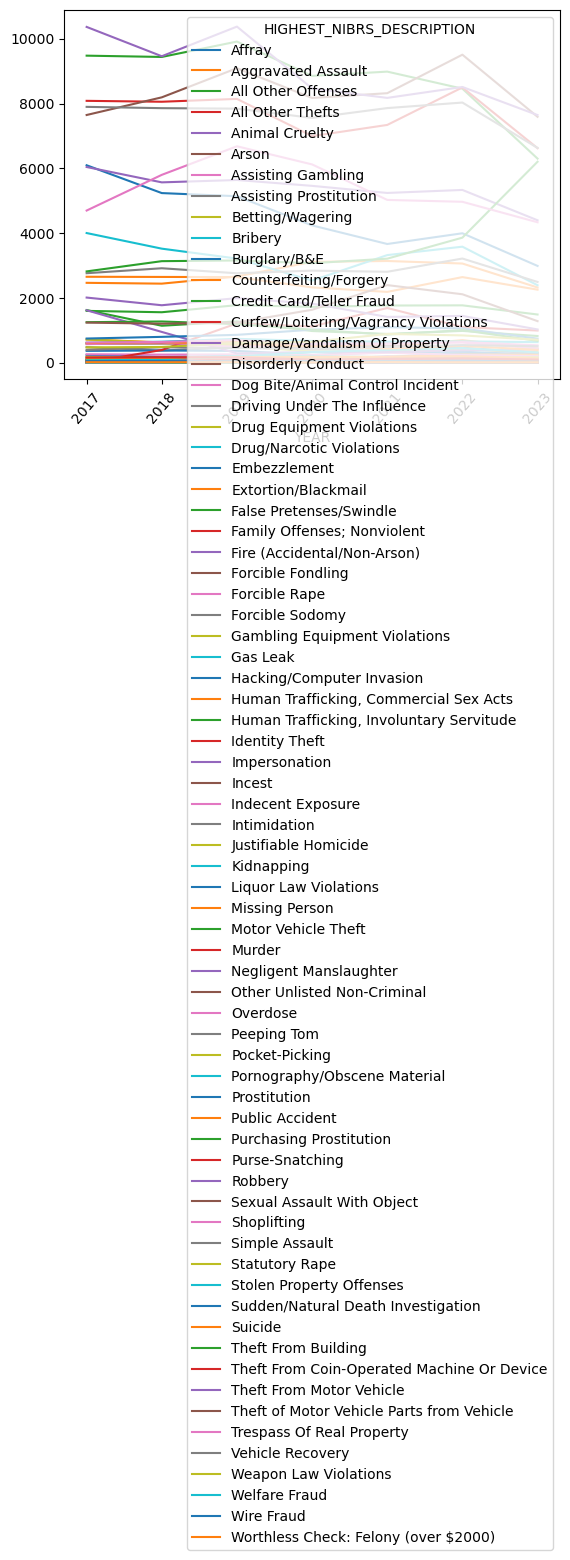

In [7]:
figure = crime_yearDF.unstack(level=0).plot(kind='line', rot=50, legend=True)

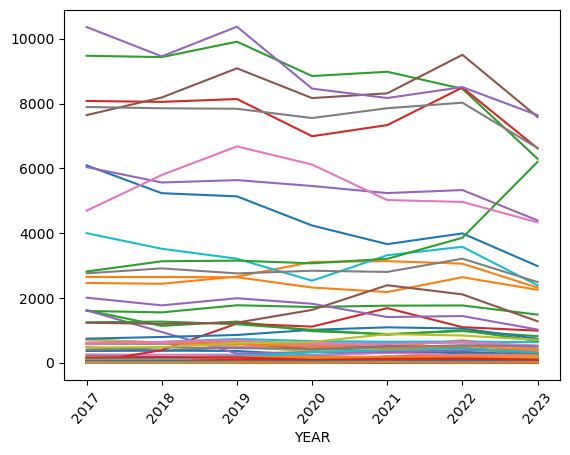

In [16]:
fig = crime_yearDF.unstack(level=0).plot(kind='line', rot=50, legend=False)